## Named Entity Recognition (NER)

* 데이터 : https://www.kaggle.com/datasets/debasisdotcom/name-entity-recognition-ner-dataset


### 📊 NER 데이터 불러오기 및 데이터 이해

In [7]:
import pandas as pd

df = pd.read_csv('./dataset/NER dataset.csv', encoding='latin1')
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [8]:
print("#### POS ####")
print(df.POS.nunique())
print(df.POS.unique())
print("#### TAG ####")
print(df.Tag.nunique())
print(df.Tag.unique())

#### POS ####
42
['NNS' 'IN' 'VBP' 'VBN' 'NNP' 'TO' 'VB' 'DT' 'NN' 'CC' 'JJ' '.' 'VBD' 'WP'
 '``' 'CD' 'PRP' 'VBZ' 'POS' 'VBG' 'RB' ',' 'WRB' 'PRP$' 'MD' 'WDT' 'JJR'
 ':' 'JJS' 'WP$' 'RP' 'PDT' 'NNPS' 'EX' 'RBS' 'LRB' 'RRB' '$' 'RBR' ';'
 'UH' 'FW']
#### TAG ####
17
['O' 'B-geo' 'B-gpe' 'B-per' 'I-geo' 'B-org' 'I-org' 'B-tim' 'B-art'
 'I-art' 'I-per' 'I-gpe' 'I-tim' 'B-nat' 'B-eve' 'I-eve' 'I-nat']


POS는 명사 전치사 형용사 동사 등 문법적 특성을 나타내는 데이터이고
Tag가 NER 태그 (개체명 등)을 분석하는 데이터로 확인 됩니다.

Tag에서 B와 I의 차이는 B가 시작 토큰에 붙고 이어지는 토큰엔 I 가 붙습니다.

* Tag value 설명

| NER 태그 | 설명 |
|----------|------|
| O        | 일반 단어 (개체명 아님) |
| B-geo    | 지명 (Beginning) |
| I-geo    | 지명 (Inside) |
| B-gpe    | 정치적 지명 (예: 국가, 도시 - Beginning) |
| I-gpe    | 정치적 지명 (Inside) |
| B-org    | 조직명 (예: 회사, 기관 - Beginning) |
| I-org    | 조직명 (Inside) |
| B-per    | 사람 이름 (Beginning) |
| I-per    | 사람 이름 (Inside) |
| B-tim    | 시간 표현 (예: 날짜, 시간 - Beginning) |
| I-tim    | 시간 표현 (Inside) |
| B-art    | 예술작품명 (책, 영화 등 - Beginning) |
| I-art    | 예술작품명 (Inside) |
| B-eve    | 이벤트명 (예: 올림픽, 전쟁 - Beginning) |
| I-eve    | 이벤트명 (Inside) |
| B-nat    | 자연물 (예: 동물, 천연물 - Beginning) |
| I-nat    | 자연물 (Inside) |

그럼 문장에서 Tag값을 분석하기 위해 Sentence를 입력으로 주고 각 token에 대해 Tag의 index가 나오도록 하는 데이터를 만들어야할 것 같습니다.

####  📂 학습 데이터 생성

1. 먼저 문장별로 word 의 list와 그를 따르는 tag 의 list로 데이터를 수정합니다.

In [9]:
df = df.fillna(method='ffill') #바로 윗값과 동일한 값으로 결측치 채워줌
group_df = df.groupby('Sentence #').agg({'Word': list, 'Tag': list}).reset_index()
group_df.head()

/tmp/ipykernel_862/1849927326.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill') #바로 윗값과 동일한 값으로 결측치 채워줌


,Sentence #,Word,Tag
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O..."
3,Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[O, O, O, O, O, O, O, O, O, O, O]"
4,Sentence: 10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo..."


2. Tag를 index로 변경한 column을 만듭니다.

In [10]:
unique_tags = sorted(df.Tag.unique())
tag2index = {tag: idx for idx, tag in enumerate(unique_tags)}
index2tag = {idx: tag for tag, idx in tag2index.items()}
print(tag2index)
group_df['tag_index'] = group_df['Tag'].apply(lambda tags: [tag2index[tag] for tag in tags])
group_df.head()

{'B-art': 0, 'B-eve': 1, 'B-geo': 2, 'B-gpe': 3, 'B-nat': 4, 'B-org': 5, 'B-per': 6, 'B-tim': 7, 'I-art': 8, 'I-eve': 9, 'I-geo': 10, 'I-gpe': 11, 'I-nat': 12, 'I-org': 13, 'I-per': 14, 'I-tim': 15, 'O': 16}


,Sentence #,Word,Tag,tag_index
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[16, 16, 16, 16, 16, 16, 2, 16, 16, 16, 16, 16..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[3, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...","[16, 16, 7, 16, 16, 16, 16, 16, 2, 16, 16, 16,..."
3,Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[O, O, O, O, O, O, O, O, O, O, O]","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]"
4,Sentence: 10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...","[2, 16, 16, 6, 14, 16, 7, 16, 2, 16, 3, 16, 3,..."


|	|Sentence #	|Word|	Tag	|tag_index|
|--|--|--|--|--|
|0|	Sentence: 1	|[Thousands, of, demonstrators, have, marched, ...|	[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...|	[16, 16, 16, 16, 16, 16, 2, 16, 16, 16, 16, 16...|
|1|	Sentence: 10|	[Iranian, officials, say, they, expect, to, ge...|	[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...|	[3, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16...|

태그가 index 형식으로 변경된걸 확인할 수 있습니다.

#### 🔠 tokenizer 설정

* is_split_into_words 설정
  * 전체 문장을 list로 넣으려면 이 설정을 해줘야 list 안에 있는 word들이 하나의 문장으로 인식된다.
    * True : [CLS] I am a good boy [SEP]
    * False : [[CLS] I [SEP]] , [[CLS] am [SEP]] , [[CLS] a [SEP]] , [[CLS] good [SEP]] , [[CLS] boy [SEP]]
* 

In [11]:
from transformers import AutoTokenizer #모델에 맞는 tokenizer를 쉽게 받아오기 위해 사용

/home/jovyan/NLP_study/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
model_name = "distilbert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [13]:
group_df.head(1)

,Sentence #,Word,Tag,tag_index
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[16, 16, 16, 16, 16, 16, 2, 16, 16, 16, 16, 16..."


In [14]:
group_df.iloc[673]['Word']

['The',
 'economists',
 'blame',
 'the',
 'slowdown',
 'on',
 'problems',
 'in',
 'advanced',
 'economies',
 ',',
 'particularly',
 'the',
 'United',
 'States',
 '.']

In [15]:
text = group_df.iloc[173]['Word']
token_output = tokenizer(text, is_split_into_words=True)
token_output

{'input_ids': [101, 1130, 1630, 117, 12778, 10456, 1157, 1263, 17277, 3070, 12530, 1114, 1241, 15967, 1105, 7721, 8945, 119, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [16]:
print(tokenizer.convert_ids_to_tokens(token_output['input_ids']))

['[CLS]', 'In', '2001', ',', 'Qatar', 'resolved', 'its', 'long', '##standing', 'border', 'disputes', 'with', 'both', 'Bahrain', 'and', 'Saudi', 'Arabia', '.', '[SEP]']


몇몇 단어가 한 word임에도 불구하고 여러 token으로 분리된 것을 확인할 수 있었다.

이렇게 들어가면 pred가 label보다 개수가 많이 나오는 결과가 나올 것 같다.

ex) U.N. > 'U' , '.' , 'N' , '.'

In [17]:
print(token_output.word_ids())

[None, 0, 1, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None]


```
['[CLS]', 'Wednesday', ',', 'the', 'U', '.', 'N', '.', 'Security', 'Council', 'passed', 'a', 'resolution', 'de', '##p', '##lor', '##ing', 'that', 'foreign', 'armed', 'groups', 'continue', 'to', 'operate', 'in', 'the', 'eastern', 'DR', '##C', ',', 'and', 'demanded', 'that', 'they', 'immediately', 'di', '##sar', '##m', '.', '[SEP]']
[None, 0, 1, 2, 3, 3, 3, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 20, 21, 22, 23, 24, 25, 26, 27, 27, 27, 28, None]
```

예시 데이터에서 이 두개를 배고하면 U . N . 이 word 3 으로 4개 매칭되어 4개의 토큰이지만 하나의 word임을 뜻하는 내용을 출력할 수 있다.

##### 📌 label 수정

|data|value|
|--|--|
|input|[CLS] internationalization is hard [SEP]|
|token|'[CLS]' 'international' '##ization' 'is' 'hard' '[SEP]'|
|word_id| 0, 1, 1, 2, 3, 4 |
|label(as-is)| None, 1, 0, 0, None |
|label(to-be)| -100, 1, -100, 0, 0, -100 |

* subword의 label을 -100 으로 바꾸는 이유
  * CrossEntropyLoss 함수에서 ignore_index 설정으로 -100은 loss 계산에서 제외해주기 때문



In [18]:
print(group_df.Word[0])

['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.']


In [19]:
def align_labels_with_tokeniizer(tokens, tag_index_list, tokenizer):
    tokenizer_output = tokenizer(tokens, is_split_into_words=True)
    word_ids = tokenizer_output.word_ids()
    new_labels = []
    prev_word_idx = None

    for word_idx in word_ids:
        if word_idx is None: # special 토큰인 경우
            new_labels.append(-100)
        elif word_idx != prev_word_idx:
            new_labels.append(tag_index_list[word_idx])
        else:
            new_labels.append(-100)
        prev_word_idx = word_idx
    return new_labels

group_df['aligned_labels'] = group_df.apply(lambda row: align_labels_with_tokeniizer(row['Word'], row['tag_index'], tokenizer), axis=1)


In [20]:
group_df.head()

,Sentence #,Word,Tag,tag_index,aligned_labels
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[16, 16, 16, 16, 16, 16, 2, 16, 16, 16, 16, 16...","[-100, 16, 16, 16, -100, -100, 16, 16, 16, 2, ..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[3, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16...","[-100, 3, 16, 16, 16, 16, 16, 16, 16, 16, 16, ..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...","[16, 16, 7, 16, 16, 16, 16, 16, 2, 16, 16, 16,...","[-100, 16, -100, -100, -100, 16, -100, 7, 16, ..."
3,Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[O, O, O, O, O, O, O, O, O, O, O]","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]","[-100, 16, 16, 16, 16, 16, 16, -100, -100, 16,..."
4,Sentence: 10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...","[2, 16, 16, 6, 14, 16, 7, 16, 2, 16, 3, 16, 3,...","[-100, 2, -100, -100, -100, 16, 16, 6, 14, -10..."


In [21]:
print(group_df.iloc[173].Word)
print(group_df.iloc[173].tag_index)
print(group_df.iloc[173].aligned_labels)

['In', '2001', ',', 'Qatar', 'resolved', 'its', 'longstanding', 'border', 'disputes', 'with', 'both', 'Bahrain', 'and', 'Saudi', 'Arabia', '.']
[16, 7, 16, 5, 16, 16, 16, 16, 16, 16, 16, 5, 16, 5, 13, 16]
[-100, 16, 7, 16, 5, 16, 16, 16, -100, 16, 16, 16, 16, 5, 16, 5, 13, 16, -100]


제대로 aligned label을 만든 걸 확인할 수 있다.

##### ~~train test 분리~~

~~sklearn 의 함수를 사용해서 분리한다.~~

나중에 모델별로 돌리다 보니 여기 사용되는 토크나이저도 모델별로 달라야한다는 걸 알아 수정

In [22]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(group_df, test_size=0.2, random_state=123)
print(f"train len : {len(train_df)} , test len : {len(test_df)}")

train len : 38367 , test len : 9592


### 🍀 Model building

재사용성 있는 코드를 작성해서 3개의 모델을 비교하고자 했습니다.

In [23]:
from datasets import Dataset

#### 📂 make dataloader

* collate_fn
  * tokens, aligned_labels 를 배치 내 문장을 묶어서 tensor로 만들어 줘야함
  * base model을 변경하면서 실험하기 위해 tokenizer 도 변수로 입력
  

In [24]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch, tokenizer):
    inputs = [item['Word'] for item in batch]
    labels = [item['aligned_labels'] for item in batch]

    tokenized = tokenizer(
        inputs,
        is_split_into_words=True,
        truncation=True,
        padding=True,
        return_tensors="pt"
    )
    
    padded_labels = pad_sequence(
        [torch.tensor(l, dtype=torch.long) for l in labels],
        batch_first=True,
        padding_value=-100
    )
    tokenized["labels"] = padded_labels

    return tokenized

In [25]:
from torch.utils.data import DataLoader
from functools import partial

def make_data_loader(train_df, test_df, model_name, batch_size=32):
    if model_name == "roberta-base":
        tokenizer = AutoTokenizer.from_pretrained(model_name, add_prefix_space=True)
    else:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    train_data = train_df.copy()
    test_data = test_df.copy()

    train_data['aligned_labels'] = train_data.apply(lambda row: align_labels_with_tokeniizer(row['Word'], row['tag_index'], tokenizer), axis=1)
    test_data['aligned_labels'] = test_data.apply(lambda row: align_labels_with_tokeniizer(row['Word'], row['tag_index'], tokenizer), axis=1)

    train_ds = Dataset.from_pandas(train_data)
    test_ds = Dataset.from_pandas(test_data)

    collate_fn_with_tokenizer = partial(collate_fn, tokenizer=tokenizer)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, collate_fn=collate_fn_with_tokenizer)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=True, collate_fn=collate_fn_with_tokenizer)

    return train_loader, test_loader, tokenizer

#### 📥 load pretrained model

* distilBERT
  * BERT 기반의 모델의 knowledge distillation 기법을 통해 경량화한 모델
  * BERT 보다 40% 적은 파라미터를 가진다.
  * https://huggingface.co/distilbert/distilbert-base-cased

* RoBERT
  * BERT 모델을 기반으로 더 많은 데이터와 더 많은 학습시간으로 pre trained 된 모델
  * https://huggingface.co/FacebookAI/roberta-base

* bert-base-cased
  * 기본적인 영어 모델
  * https://huggingface.co/google-bert/bert-base-cased

In [26]:
robert_train_loader, robert_test_loader, robert_tokenizer = make_data_loader(train_df, test_df, "roberta-base")

In [27]:
distil_train_loader, distil_test_loader, distil_tokenizer = make_data_loader(train_df, test_df, "distilbert-base-cased")
robert_train_loader, robert_test_loader, robert_tokenizer = make_data_loader(train_df, test_df, "roberta-base")
bert_train_loader, bert_test_loader, bert_tokenizer = make_data_loader(train_df, test_df, "bert-base-cased")

##### 📊 base 모델 성능 비교
* AutoModelForTokenClassification 를 사용해 base model 성능을 측정합니다.

In [28]:
from transformers import AutoModelForTokenClassification

num_labels = len(tag2index)
id2label = {i: tag for tag, i in tag2index.items()}
label2id = tag2index

print(id2label)
print(label2id)

{0: 'B-art', 1: 'B-eve', 2: 'B-geo', 3: 'B-gpe', 4: 'B-nat', 5: 'B-org', 6: 'B-per', 7: 'B-tim', 8: 'I-art', 9: 'I-eve', 10: 'I-geo', 11: 'I-gpe', 12: 'I-nat', 13: 'I-org', 14: 'I-per', 15: 'I-tim', 16: 'O'}
{'B-art': 0, 'B-eve': 1, 'B-geo': 2, 'B-gpe': 3, 'B-nat': 4, 'B-org': 5, 'B-per': 6, 'B-tim': 7, 'I-art': 8, 'I-eve': 9, 'I-geo': 10, 'I-gpe': 11, 'I-nat': 12, 'I-org': 13, 'I-per': 14, 'I-tim': 15, 'O': 16}


In [29]:
def get_classification_base_model(model_name):
    return AutoModelForTokenClassification.from_pretrained(
        model_name,
        num_labels = num_labels,
        id2label = id2label,
        label2id = label2id
    )

In [30]:
distil_model = get_classification_base_model("distilbert-base-cased")
robert_model = get_classification_base_model("roberta-base")
bert_model = get_classification_base_model("bert-base-cased")

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
distil_model.to('cuda')
robert_model.to('cuda')
bert_model.to('cuda')

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

##### save_classification_report

* classification_report
  * 분류모델에서 precision recall F1 acc를 정리해주는 함수
  * 이 method를 사용해서 report를 저장하기 위한 함수 생성

In [32]:
from sklearn.metrics import classification_report
from tqdm import tqdm
import torch
import numpy as np
import json

def save_classification_report(all_labels, all_preds, index2tag, model_name):
    report_dict = classification_report(
        all_labels, all_preds,
        target_names = [index2tag[i] for i in sorted(index2tag)],
        output_dict=True
    )
    file_name = f"base_{model_name}_report.json"
    with open(file_name, "w") as f:
        json.dump(report_dict, f, indent=2)
    print(f"save report {model_name}...")
    

In [33]:
def evalutate_mode(model, model_name, data_loader, index2tag):
    model.to('cuda')

    raw_preds = []
    raw_labels = []

    with torch.no_grad():
        for data in tqdm(data_loader):
            input_ids = data['input_ids'].to('cuda')
            attention_mask = data['attention_mask'].to('cuda')
            labels = data['labels'].to('cuda')

            outputs = model(input_ids = input_ids, attention_mask = attention_mask)
            outputs = outputs.logits
            preds = torch.argmax(outputs, dim=-1)

            for pred, label in zip(preds, labels):
                pred = pred.cpu().numpy()
                label = label.cpu().numpy()
                for p, l in zip (pred, label):
                    if l != -100: # -100인 경우 무시였음
                        raw_preds.append(p)
                        raw_labels.append(l)

    save_classification_report(raw_labels, raw_preds, index2tag, model_name)


In [34]:
models = [distil_model, robert_model, bert_model]
model_names = ["DistilBERT", "RoBERTa", "BERT"]
test_loaders = [distil_test_loader, robert_test_loader, bert_test_loader]

for model, name, test_l in zip(models, model_names, test_loaders):
    print(f"\n>> Evaluate {name}...")
    evalutate_mode(model, name, test_l, index2tag)


>> Evaluate DistilBERT...


100%|██████████| 300/300 [00:05<00:00, 53.15it/s]


save report DistilBERT...

>> Evaluate RoBERTa...


100%|██████████| 300/300 [00:08<00:00, 36.79it/s]
/home/jovyan/NLP_study/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jovyan/NLP_study/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jovyan/NLP_study/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

save report RoBERTa...

>> Evaluate BERT...


100%|██████████| 300/300 [00:08<00:00, 35.70it/s]


save report BERT...


#### 🔨 set classification layer

label의 개수대로 Linear Layer로 classification 하는 layer를 추가한 NERClassification class를 만듭니다.

* NERClassification
  1. pretrained model
  2. classification layer

In [35]:
len(index2tag)

17

In [36]:
from transformers import AutoModel

distil_base_model = AutoModel.from_pretrained("distilbert-base-cased")
robert_base_model = AutoModel.from_pretrained("roberta-base")
bert_base_model = AutoModel.from_pretrained("bert-base-cased")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
import torch.nn as nn

class NERClassification(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.encoder = model
        self.dropout = nn.Dropout(p=0.1)
        self.classifier = nn.Linear(self.encoder.config.hidden_size, 17) ## len(index2tag)의 값이 17

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.encoder(input_ids = input_ids, attention_mask = attention_mask).last_hidden_state
        outputs = self.dropout(outputs)
        preds = self.classifier(outputs)

        return preds

In [38]:
distil_finetune_model = NERClassification(distil_base_model)
robert_finetune_model = NERClassification(robert_base_model)
bert_finetune_model = NERClassification(bert_base_model)

3개 모델에 대해 기본 pre trained model의 layer는 freeze 한다.

In [39]:
finetune_models = [distil_finetune_model, robert_finetune_model, bert_finetune_model]

for model in finetune_models:
    for param in model.encoder.parameters():
        param.requires_grad = False

#### 📈 finetuning

In [40]:
import matplotlib.pyplot as plt

from transformers import get_scheduler
from torch.optim import AdamW


In [41]:
for model in finetune_models:
    model.to('cuda')

In [42]:
def eval_accuracy(model, model_name, dataloader, print_report=False):
    model.eval()
    model.to('cuda')

    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in tqdm(dataloader, desc="Evaluating", leave=False):
            input_ids = data['input_ids'].to('cuda')
            attention_mask = data['attention_mask'].to('cuda')
            labels = data['labels'].to('cuda')

            preds = model(input_ids=input_ids, attention_mask = attention_mask)
            preds = torch.argmax(preds, dim=-1)

            for pred, label in zip(preds, labels):
                for p, l in zip(pred, label):
                    if l == -100:
                        continue
                    if print_report:
                        all_preds.append(p.item())
                        all_labels.append(l.item())
                    total += 1
                    correct += (p==l).item()

    if print_report:
        save_classification_report(all_labels, all_preds, index2tag, model_name)
    acc = correct/total if total > 0 else 0.0
    print(f"[{model_name} Eval Acc] {acc: .4f}")
    return acc

* scheduler
  * **학습률(learning rate)**를 훈련 중에 점진적으로 조정해주는 도구
  * "linear" : 선형적으로 감소시키는 스케쥴러
    * warmup_step만큼 증가 num_training_step 만큼 감소

In [46]:
def train_model(model, model_name, train_loader, test_loader, optimizer, scheduler, num_epochs):
    loss_fn = torch.nn.CrossEntropyLoss(ignore_index=-100)

    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    for epoch in range(num_epochs):
        total_loss = 0.
        model.train()

        for data in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
            model.zero_grad()

            inputs = data['input_ids'].to('cuda')
            attention_mask = data['attention_mask'].to('cuda')
            labels = data['labels'].to('cuda')

            preds = model(input_ids=inputs, attention_mask=attention_mask)

            loss = loss_fn(preds.view(-1, preds.size(-1)), labels.view(-1))

            loss.backward()
            optimizer.step()
            scheduler.step()

            total_loss += loss.item()

        print(f"[Epoch {epoch}] Train loss: {total_loss:.4f}")

        print("[Test Acc]")
        test_acc = eval_accuracy(model, model_name, test_loader, print_report=(epoch==num_epochs-1))

        train_loss_list.append(total_loss)
        test_acc_list.append(test_acc)

    return train_loss_list, test_acc_list

In [47]:
def finetune_model(model, model_name, train_loader, test_loader, lr, num_epochs):
    model.to('cuda')

    optimizer = AdamW(model.parameters(), lr=lr)

    total_steps=len(train_loader)* num_epochs
    scheduler = get_scheduler(
        name="linear",
        optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=total_steps
    )

    train_loss_list, test_acc_list = train_model(
        model = model,
        model_name = model_name,
        train_loader = train_loader,
        test_loader = test_loader,
        optimizer = optimizer,
        scheduler = scheduler,
        num_epochs = num_epochs
    )

    return train_loss_list, test_acc_list

In [48]:
distil_loss, distil_test_acc = finetune_model(distil_finetune_model, "DistilBERT-finetune", distil_train_loader, distil_test_loader, 0.001, 3)

Epoch 1/3: 100%|██████████| 1199/1199 [00:19<00:00, 62.38it/s]


[Epoch 0] Train loss: 203.3426
[Test Acc]


[DistilBERT-finetune Eval Acc]  0.9540


Epoch 2/3: 100%|██████████| 1199/1199 [00:19<00:00, 62.36it/s]


[Epoch 1] Train loss: 191.7298
[Test Acc]


[DistilBERT-finetune Eval Acc]  0.9554


Epoch 3/3: 100%|██████████| 1199/1199 [00:19<00:00, 62.28it/s]


[Epoch 2] Train loss: 188.3608
[Test Acc]


save report DistilBERT-finetune...
[DistilBERT-finetune Eval Acc]  0.9556


In [49]:
robert_loss, robert_test_acc = finetune_model(robert_finetune_model, "RoBERTa-finetune", robert_train_loader, robert_test_loader, 0.001, 3)

Epoch 1/3: 100%|██████████| 1199/1199 [00:31<00:00, 37.84it/s]


[Epoch 0] Train loss: 403.4286
[Test Acc]


[RoBERTa-finetune Eval Acc]  0.9500


Epoch 2/3: 100%|██████████| 1199/1199 [00:31<00:00, 37.54it/s]


[Epoch 1] Train loss: 233.9981
[Test Acc]


[RoBERTa-finetune Eval Acc]  0.9530


Epoch 3/3: 100%|██████████| 1199/1199 [00:31<00:00, 38.01it/s]


[Epoch 2] Train loss: 223.0349
[Test Acc]


save report RoBERTa-finetune...
[RoBERTa-finetune Eval Acc]  0.9535


/home/jovyan/NLP_study/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jovyan/NLP_study/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jovyan/NLP_study/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [50]:
bert_loss, bert_test_acc = finetune_model(bert_finetune_model, "BERT-finetune", bert_train_loader, bert_test_loader, 0.001, 3)

Epoch 1/3: 100%|██████████| 1199/1199 [00:31<00:00, 37.54it/s]


[Epoch 0] Train loss: 302.9510
[Test Acc]


[BERT-finetune Eval Acc]  0.9535


Epoch 2/3: 100%|██████████| 1199/1199 [00:31<00:00, 38.46it/s]


[Epoch 1] Train loss: 206.6014
[Test Acc]


[BERT-finetune Eval Acc]  0.9560


Epoch 3/3: 100%|██████████| 1199/1199 [00:31<00:00, 38.19it/s]


[Epoch 2] Train loss: 199.2357
[Test Acc]


save report BERT-finetune...
[BERT-finetune Eval Acc]  0.9563


#### 📊 loss graph

In [51]:
def plot_loss(mode_name, loss_list):
    plt.plot(loss_list)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'[{model_name} ]Training Loss per Epoch')
    plt.grid(True)
    plt.show()

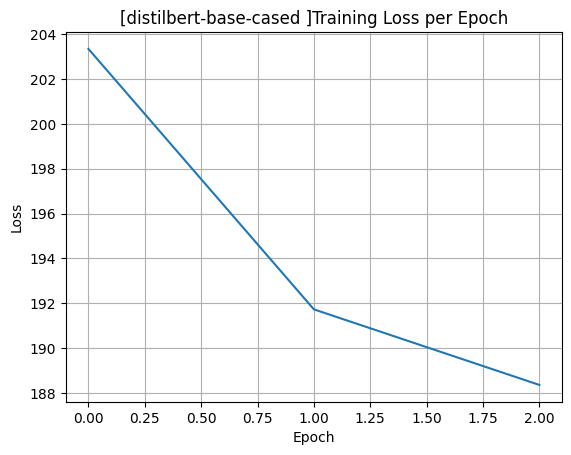

None


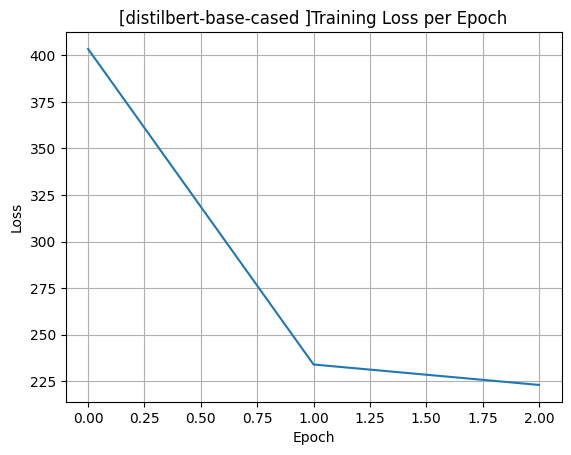

None


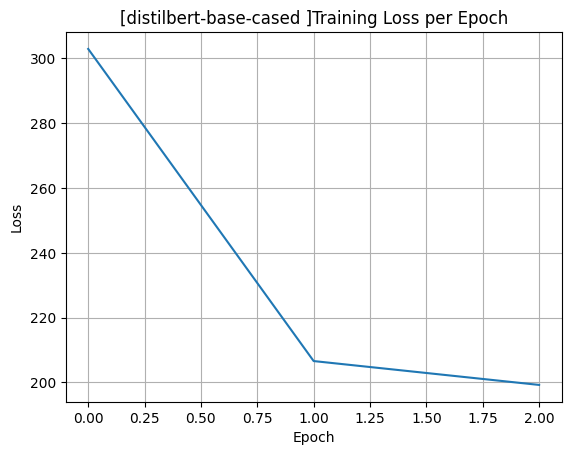

None


In [52]:
print(plot_loss("distilBERT", distil_loss))
print(plot_loss("roBERT", robert_loss))
print(plot_loss("BERT", bert_loss))

#### 📝 정확도 분석

report를 보면 3개의 정확도를 나타내는 변수들이 있다.

* Accuracy : 전체 토큰 중 맞춘 비율
* macro avg : 클래스별 F1의 단순 평균
* weighted avg : 클래스별 F1의 가중 평균 (비율 기준으로)

  * F1 score : Precision과 Recall의 조화 평균

위와 같은 특성때문에 macro 와 weight-avg/Acc와 차이가 난다.

Acc와 weight-avg는 O의 비율이 많으면 높아지는 경향이 있어서 macro-avg를 주로 비교한다.


In [56]:
import json

def load_report(filepath):
    with open(filepath, 'r') as f:
        return json.load(f)

reports = {
    "BERT": {
        "base": load_report("base_BERT_report.json"),
        "finetune": load_report("base_BERT-finetune_report.json")
    },
    "RoBERTa": {
        "base": load_report("base_RoBERTa_report.json"),
        "finetune": load_report("base_RoBERTa-finetune_report.json")
    },
    "DistilBERT": {
        "base": load_report("base_DistilBERT_report.json"),
        "finetune": load_report("base_DistilBERT-finetune_report.json")
    }
}

In [68]:
def plot_base_vs_finetune_f1(reports):
    for model_name, result in reports.items():
        base_f1 = result["base"]["weighted avg"]["f1-score"]
        fine_f1 = result["finetune"]["weighted avg"]["f1-score"]

        plt.figure()
        plt.bar(["Base", "Fine-tuned"], [base_f1, fine_f1])
        plt.title(f"{model_name}: Base vs Fine-tuned (Macro F1)")
        plt.ylabel("F1-score")
        plt.ylim(0, 1)
        plt.grid(axis='y')
        plt.show()

In [63]:
def plot_finetuned_model_comparison(reports):
    model_names = []
    f1_scores = []

    for model_name, result in reports.items():
        model_names.append(model_name)
        f1_scores.append(result["finetune"]["weighted avg"]["f1-score"])

    plt.figure()
    plt.bar(model_names, f1_scores)
    plt.title("Fine-tuned Model Comparison (Macro F1)")
    plt.ylabel("F1-score")
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.show()

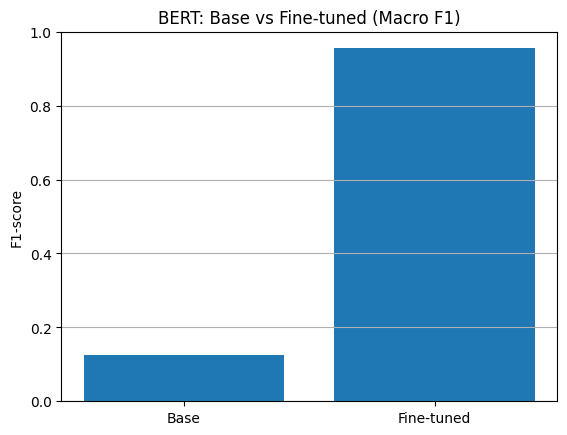

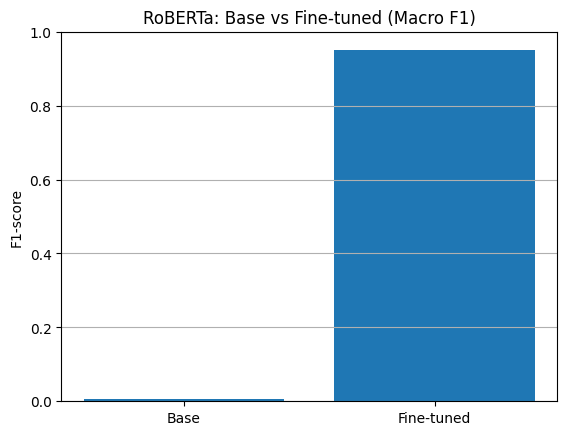

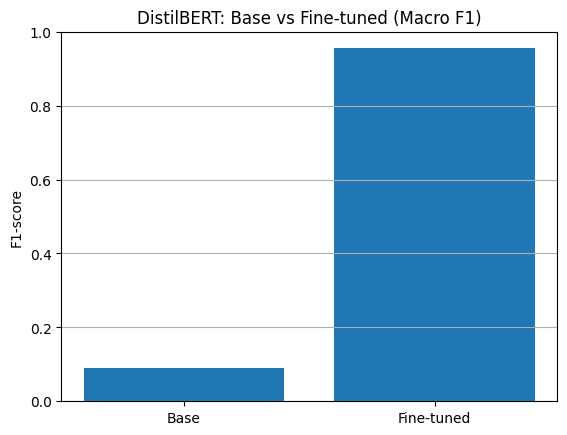

In [69]:
plot_base_vs_finetune_f1(reports)

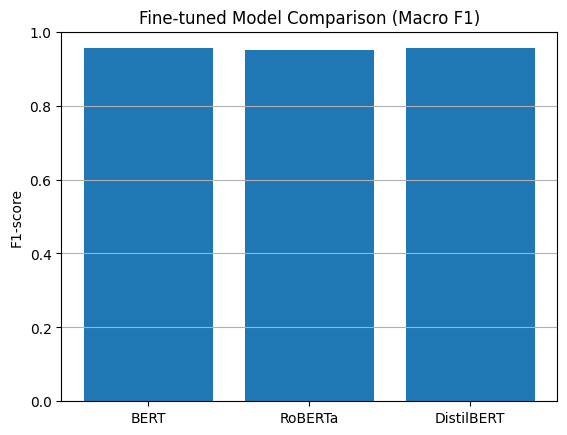

In [65]:
plot_finetuned_model_comparison(reports)

In [66]:
def print_report_summary(report, label=""):
    print(f"\n=== {label} Report Summary ===")
    print("Accuracy       :", report["accuracy"])
    print("Macro F1 score :", report["macro avg"]["f1-score"])
    print("Weighted F1    :", report["weighted avg"]["f1-score"])

In [67]:
print_report_summary(reports["BERT"]["finetune"], label="BERT Fine tuned")


=== BERT Fine tuned Report Summary ===
Accuracy       : 0.9563468805245426
Macro F1 score : 0.5670287410626359
Weighted F1    : 0.9548205498676731


label 당 불균형이 심해서 weighted 값을 봐야하는 것 같다.

어떤 모델을 써도 대폭 성능이 올라간 걸 확인할 수 있었다.